In [2]:
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt 

In [45]:
Euroc_imu = 'data/Euroc_imu.csv'
Varos_poses = 'data/Varos_vehicle0_poses_euler.csv'
Euroc_df = pd.read_csv(Euroc_imu)
# Euroc_df = 
Varos_df = pd.read_csv(Varos_poses)
Euroc_df.head()

,#timestamp [ns],w_RS_S_x [rad s^-1],w_RS_S_y [rad s^-1],w_RS_S_z [rad s^-1],a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2]
0,1403636579758555392,-0.099135,0.147306,0.027227,8.147692,-0.375922,-2.402629
1,1403636579763555584,-0.099135,0.140324,0.029322,8.033281,-0.408610,-2.402629
2,1403636579768555520,-0.098437,0.127758,0.037699,7.886181,-0.424955,-2.435318
3,1403636579773555456,-0.102625,0.115890,0.045379,7.828976,-0.375922,-2.468007
4,1403636579778555392,-0.105418,0.108210,0.051662,7.714565,-0.408610,-2.557901


In [46]:
Varos_df.head()

,# timestamp [ns],s_x_vw,s_y_vw,s_z_vw,theta_x_vw,theta_y_vw,theta_z_vw
0,4999936.0,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425
1,10000000.0,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425
2,15000064.0,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425
3,20000000.0,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425
4,24999936.0,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425


In [47]:
df = Varos_df.copy()
# Convert 'Timestamp' column to datetime object
df['# timestamp [ns]'] = pd.to_datetime(df['# timestamp [ns]'] , unit='ns')

# Set 'Timestamp' as the index
df.set_index('# timestamp [ns]', inplace=True)

# Sort the DataFrame based on the timestamp (optional)
df.sort_index(inplace=True)
# Calculate the time differences between consecutive rows
time_diff = df.index.to_series().diff().dt.total_seconds()

# Calculate the differentiation of the 'Value' column with respect to time
differentiated_values = df['s_x_vw'].diff() / time_diff
df['dx'] = differentiated_values

differentiated_values = df['s_y_vw'].diff() / time_diff
df['dy'] = differentiated_values

differentiated_values = df['s_z_vw'].diff() / time_diff
df['dz'] = differentiated_values

differentiated_values = df['theta_x_vw'].diff() / time_diff
df['d_theta_x'] = differentiated_values

differentiated_values = df['theta_y_vw'].diff() / time_diff
df['d_theta_y'] = differentiated_values

differentiated_values = df['theta_z_vw'].diff() / time_diff
df['d_theta_z'] = differentiated_values
df = df.fillna(method='bfill', inplace=False)

differentiated_values = df['dx'].diff() / time_diff
df['d2x'] = differentiated_values

differentiated_values = df['dy'].diff() / time_diff
df['d2y'] = differentiated_values

differentiated_values = df['dz'].diff() / time_diff
df['d2z'] = differentiated_values

df = df.fillna(method='bfill', inplace=False)
df.head()

,s_x_vw,s_y_vw,s_z_vw,theta_x_vw,theta_y_vw,theta_z_vw,dx,dy,dz,d_theta_x,d_theta_y,d_theta_z,d2x,d2y,d2z
# timestamp [ns],,,,,,,,,,,,,,,
1970-01-01 00:00:00.004999936,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
1970-01-01 00:00:00.010000000,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
1970-01-01 00:00:00.015000064,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425,0.000008,-0.000006,4.689656e-07,-2.554077e-07,-1.209164e-14,8.243078e-09,0.001668,-0.001205,0.000094
1970-01-01 00:00:00.020000000,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425,0.000033,-0.000024,1.828826e-06,-1.003773e-06,-4.752110e-14,3.239610e-08,0.004870,-0.003517,0.000272
1970-01-01 00:00:00.024999936,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425,0.000080,-0.000058,4.457889e-06,-2.465659e-06,-1.167304e-13,7.957736e-08,0.009480,-0.006846,0.000526


In [6]:
Varos_df.head() 

,# timestamp [ns],s_x_vw,s_y_vw,s_z_vw,theta_x_vw,theta_y_vw,theta_z_vw
0,4999936.0,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425
1,10000000.0,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425
2,15000064.0,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425
3,20000000.0,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425
4,24999936.0,-20.650703,-19.451828,1.846878,-1.570796,3.637914e-08,-2.158425


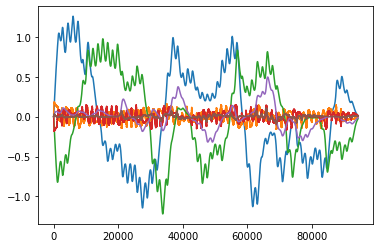

In [48]:
# plt.plot(df['s_x_vw'].to_list())
plt.plot(df['dx'].to_list())
plt.plot(df['d2x'].to_list())


plt.plot(df['dy'].to_list())
plt.plot(df['d2y'].to_list())


plt.plot(df['dz'].to_list())
plt.plot(df['d2z'].to_list())

In [49]:
# create new df as the euroc csv format
new_df = pd.DataFrame(columns=Euroc_df.columns)
print(new_df.shape)
new_df['#timestamp [ns]']=Varos_df['# timestamp [ns]']
print(new_df.shape)

new_df['w_RS_S_x [rad s^-1]'] = df['d_theta_x'].to_list()
new_df['w_RS_S_y [rad s^-1]'] = df['d_theta_y'].to_list()
new_df['w_RS_S_z [rad s^-1]'] = df['d_theta_z'].to_list()

new_df['a_RS_S_x [m s^-2]'] = df['d2x'].to_list()
new_df['a_RS_S_y [m s^-2]'] = df['d2y'].to_list()
new_df['a_RS_S_z [m s^-2]'] = df['d2z'].to_list()

new_df.head()

(0, 7)
(94284, 7)


,#timestamp [ns],w_RS_S_x [rad s^-1],w_RS_S_y [rad s^-1],w_RS_S_z [rad s^-1],a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2]
0,4999936.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
1,10000000.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
2,15000064.0,-2.554077e-07,-1.209164e-14,8.243078e-09,0.001668,-0.001205,0.000094
3,20000000.0,-1.003773e-06,-4.752110e-14,3.239610e-08,0.004870,-0.003517,0.000272
4,24999936.0,-2.465659e-06,-1.167304e-13,7.957736e-08,0.009480,-0.006846,0.000526


In [112]:
# new_df.to_csv('data/calculated_varos_imu.csv',index=False)

In [67]:
1403636579758555392
print(1403636579763555584-1403636579758555392)
print(1403636579768555520 -1403636579763555584)
print(1403636579773555456-1403636579768555520)

5000192
4999936
4999936


In [61]:
new_df.sort_values(by='#timestamp [ns]',inplace=True)
new_df.reset_index(drop=True, inplace=True)
new_df['#timestamp [ns]'] = new_df['#timestamp [ns]'] - new_df['#timestamp [ns]'].iloc[0]

time_diffs = new_df['#timestamp [ns]'].diff()

Euroc_df.sort_values(by='#timestamp [ns]',inplace=True)
Euroc_df.reset_index(drop=True, inplace=True)
Euroc_df['#timestamp [ns]'] = Euroc_df['#timestamp [ns]'] - Euroc_df['#timestamp [ns]'].iloc[0]

time_diffs2 = Euroc_df['#timestamp [ns]'].diff()

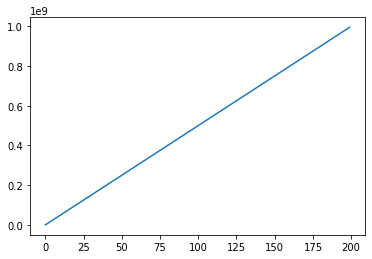

In [64]:
plt.plot(new_df['#timestamp [ns]'].to_numpy()[:200])

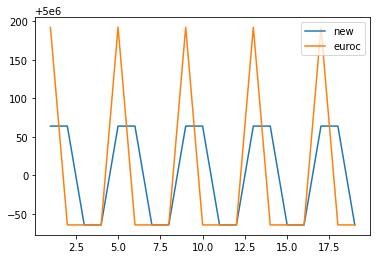

In [65]:
plt.plot(time_diffs.head(20),label='new')
plt.plot(time_diffs2.head(20),label='euroc')
plt.legend()